# Setting up the notebook

<a href="https://colab.research.google.com/github/jkoks-svg/ML_Project_ENSAE/blob/main/ML_Project_ENSAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
!pwd
!ls /content/drive/MyDrive/dropoutdata.csv

Preprocessing Libraries

In [ ]:
!pip install doubleml
!pip install xgboost
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import doubleml as dml

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from xgboost import XGBClassifier, XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

# Set notebook styling for better visuals

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load the dataset

In [ ]:
df=pd.read_csv("/Users/jakob/Documents/Parforceleistung/Studium/MSc Economics/Semester 4/Machine Learning for Econometrics/Project/data.csv", sep=";")
#df=pd.read_csv("/content/drive/MyDrive/dropoutdata.csv", sep=";")

# Display the first few rows of the dataset to get an overview

In [ ]:
display(df.head())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Description of key variables in the dataset

In [55]:
print("Dataset Description:")
dataset_description = {
    "Target": "Student status: Graduate, Dropout, or Enrolled",
    "Course": "Study program the student is enrolled in",
    "Age at enrollment": "Age of the student at the time of enrollment",
    "Gender": "Binary indicator (0 = Male, 1 = Female)",
    "Scholarship holder": "Binary indicator for receiving a scholarship (0 = No, 1 = Yes)",
    "Tuition fees up to date": "Indicator if tuition fees are paid (0 = No, 1 = Yes)",
    "Debtor": "Indicator if the student has outstanding debts (0 = No, 1 = Yes)",
    "Admission grade": "Grade obtained at admission",
    "Previous qualification": "Previous academic qualification of the student",
    "Previous qualification grade": "Grade obtained in the previous qualification",
    "Displaced": "Indicator if the student is displaced (0 = No, 1 = Yes)",
    "Educational special needs": "Indicator for special education needs (0 = No, 1 = Yes)",
    "International": "Indicator if the student is international (0 = No, 1 = Yes)",
    "Mother's qualification": "Educational qualification of the student's mother",
    "Father's qualification": "Educational qualification of the student's father",
    "Mother's occupation": "Occupation of the student's mother",
    "Father's occupation": "Occupation of the student's father",
    "Unemployment rate": "Unemployment rate in the country during enrollment",
    "GDP growth rate": "GDP growth rate at the time of enrollment",
    "Inflation rate": "Inflation rate at the time of enrollment"
}
for var, desc in dataset_description.items():
    print(f"{var}: {desc}")

Dataset Description:
Target: Student status: Graduate, Dropout, or Enrolled
Course: Study program the student is enrolled in
Age at enrollment: Age of the student at the time of enrollment
Gender: Binary indicator (0 = Male, 1 = Female)
Scholarship holder: Binary indicator for receiving a scholarship (0 = No, 1 = Yes)
Tuition fees up to date: Indicator if tuition fees are paid (0 = No, 1 = Yes)
Debtor: Indicator if the student has outstanding debts (0 = No, 1 = Yes)
Admission grade: Grade obtained at admission
Previous qualification: Previous academic qualification of the student
Previous qualification grade: Grade obtained in the previous qualification
Displaced: Indicator if the student is displaced (0 = No, 1 = Yes)
Educational special needs: Indicator for special education needs (0 = No, 1 = Yes)
International: Indicator if the student is international (0 = No, 1 = Yes)
Mother's qualification: Educational qualification of the student's mother
Father's qualification: Educational qua

# Check for missing values in the dataset

In [56]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 Series([], dtype: int64)


In [ ]:
print(df.describe())

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%      

The data consists of 4424 observations and is supported by program SATDAP - Capacitação da Administração Pública under grant POCI-05-5762-FSE-000191, Portugal. We use Target as our outcome variable, **Y**, in our analysis.

# Visualization of the target variable distribution

/var/folders/2t/48g1hgqx30s07cfsvjg95f4w0000gn/T/ipykernel_10450/759501499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Target", data=df, palette="pastel")


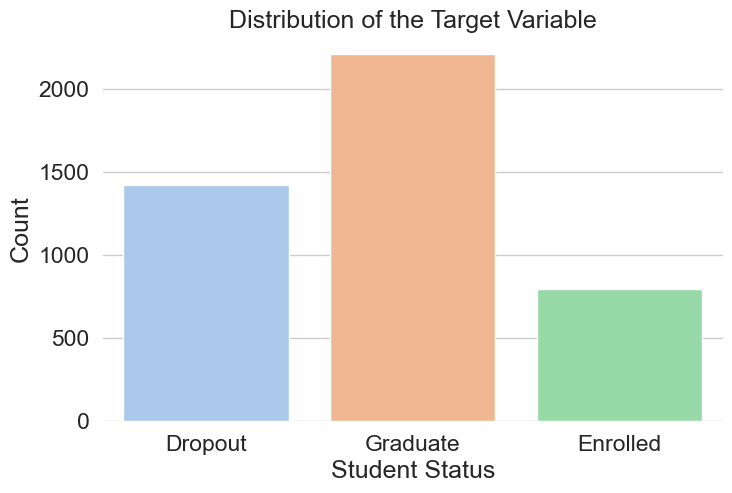

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Target", data=df, palette="pastel")
plt.title("Distribution of the Target Variable")
plt.xlabel("Student Status")
plt.ylabel("Count")
plt.show()

Dropout rates seem to be highly associated with Previous Qualification Grade, Scholarship Holder status and Gender.


# Visualizing dropout rates across different study programs

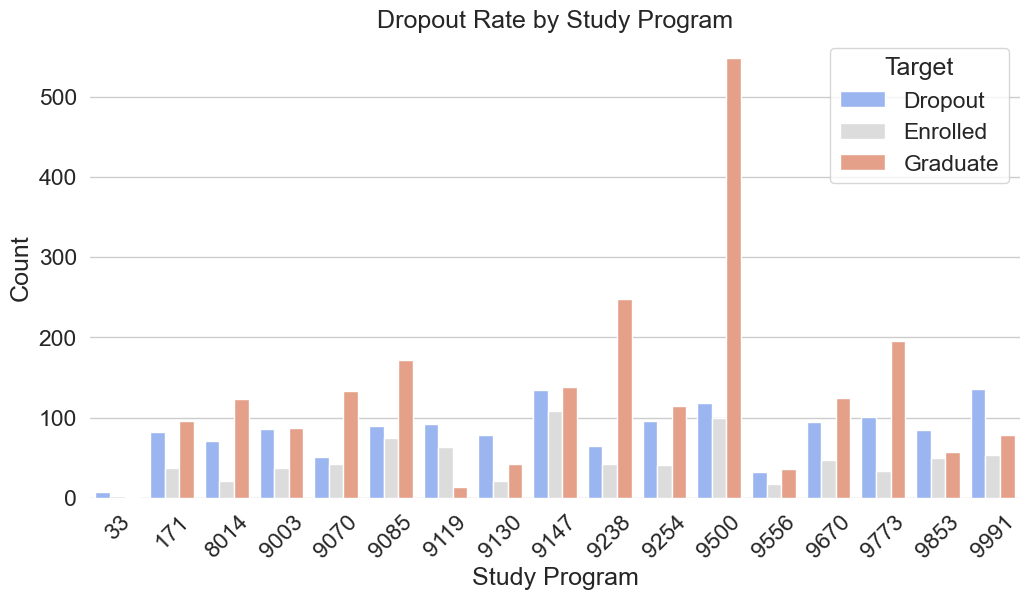

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Course", hue="Target", data=df, palette="coolwarm")
plt.title("Dropout Rate by Study Program")
plt.xlabel("Study Program")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Boxplot to compare admission grades across student statuses

/var/folders/2t/48g1hgqx30s07cfsvjg95f4w0000gn/T/ipykernel_10450/871766737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Target", y="Admission grade", data=df, palette="Set2")


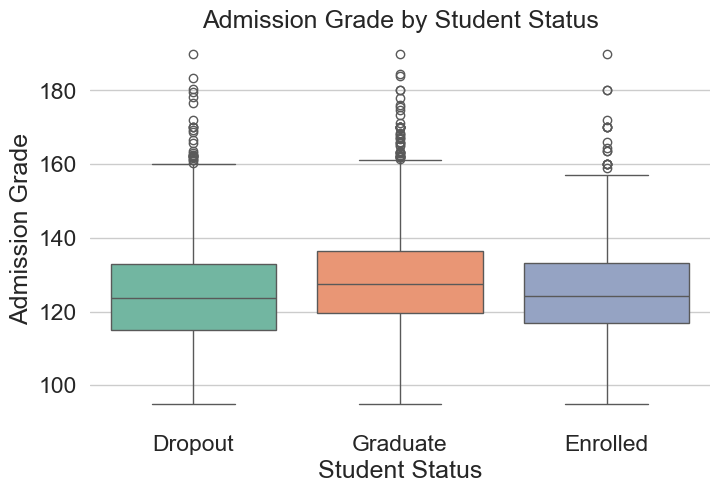

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Target", y="Admission grade", data=df, palette="Set2")
plt.title("Admission Grade by Student Status")
plt.xlabel("Student Status")
plt.ylabel("Admission Grade")
plt.show()

/var/folders/2t/48g1hgqx30s07cfsvjg95f4w0000gn/T/ipykernel_10450/1710389761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Target", y="Admission grade", data=df, palette="muted")


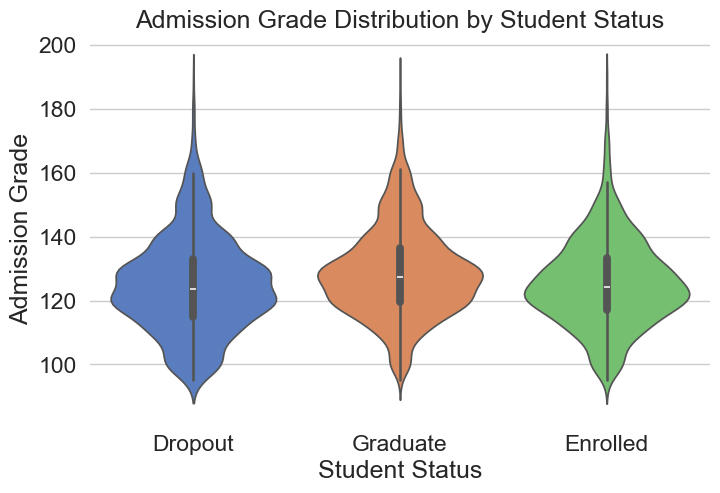

In [60]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="Target", y="Admission grade", data=df, palette="muted")
plt.title("Admission Grade Distribution by Student Status")
plt.xlabel("Student Status")
plt.ylabel("Admission Grade")
plt.show()

# Comparing dropout rates among scholarship holders and non-holders

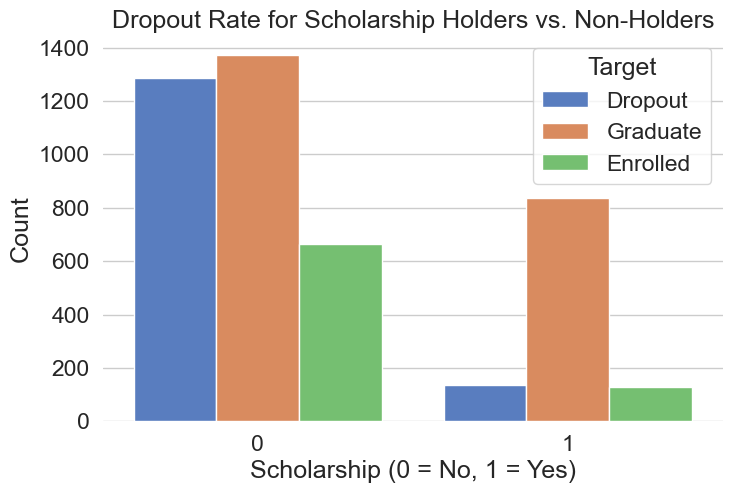

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Scholarship holder", hue="Target", data=df, palette="muted")
plt.title("Dropout Rate for Scholarship Holders vs. Non-Holders")
plt.xlabel("Scholarship (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

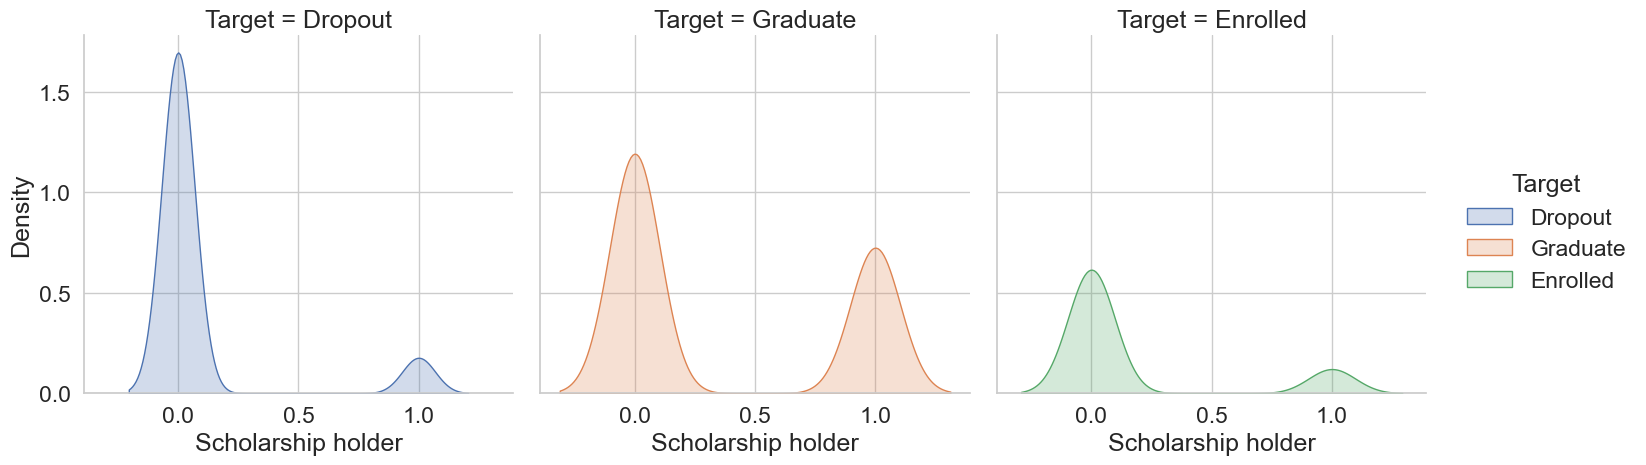

In [ ]:
_ = sns.displot(df, x="Scholarship holder", hue="Target", col="Target",
                kind="kde", fill=True)

# Comparing dropout rates among gender

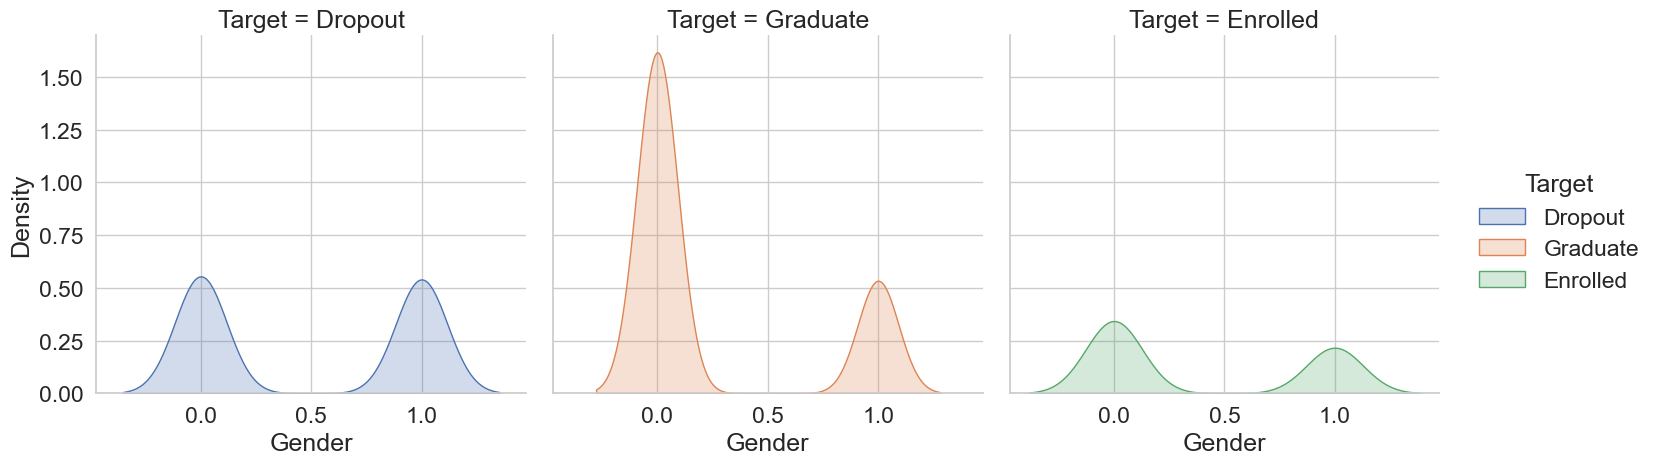

In [ ]:
_ = sns.displot(df, x="Gender", hue="Target", col="Target",
                kind="kde", fill=True)

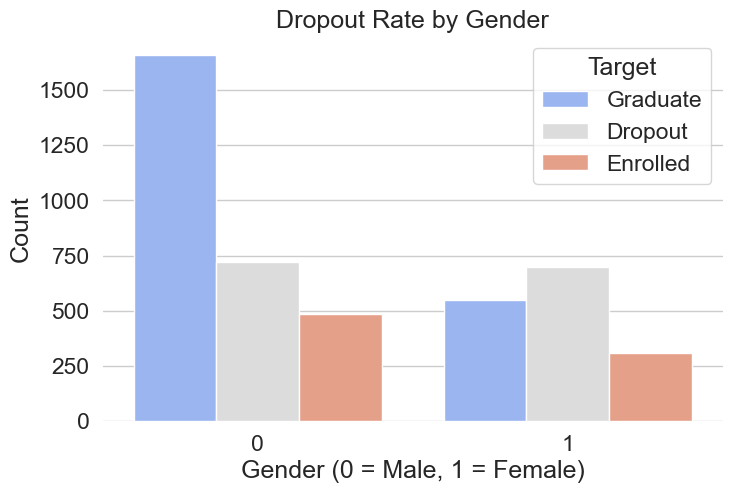

In [58]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Gender", hue="Target", data=df, palette="coolwarm")
plt.title("Dropout Rate by Gender")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Count")
plt.show()

# Distribution of age at enrollment

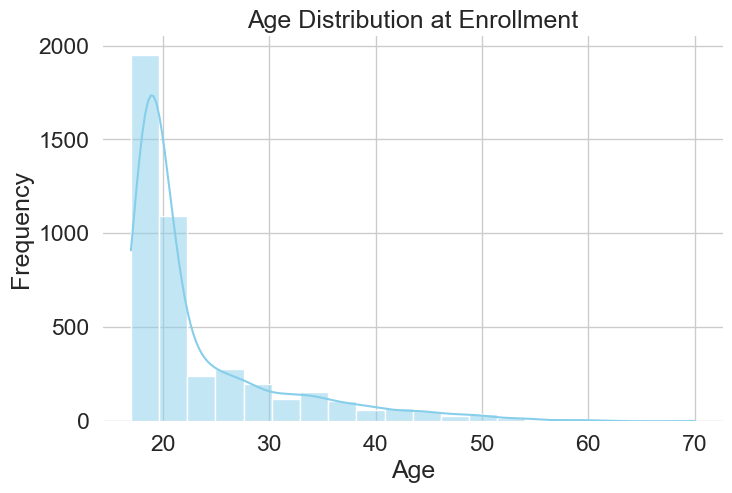

In [57]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Age at enrollment"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution at Enrollment")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap of selected numerical features

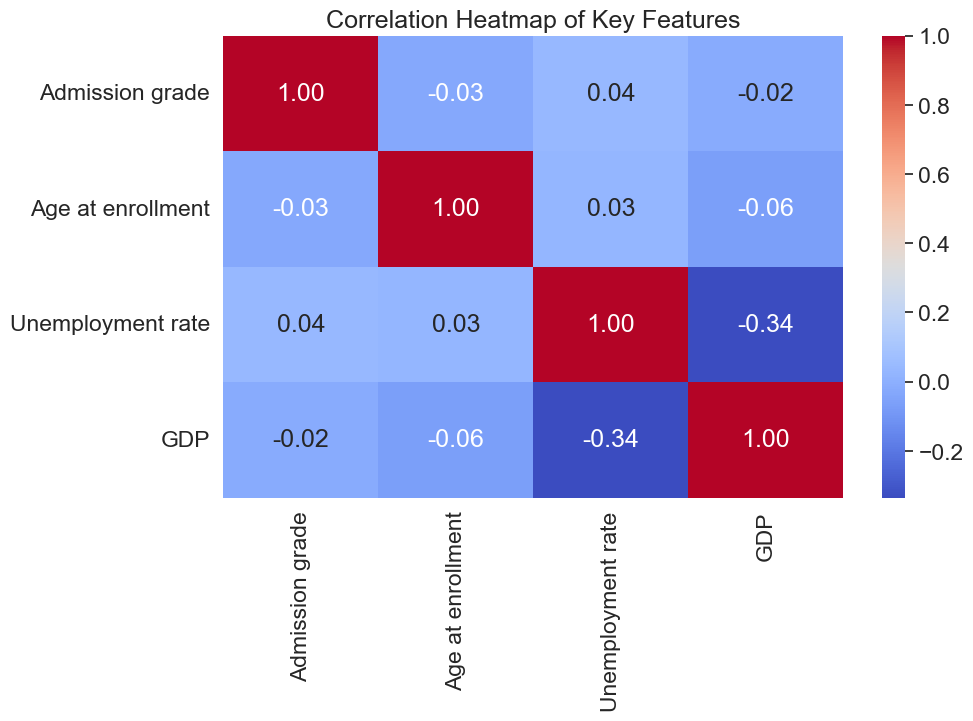

In [63]:
selected_features = ["Admission grade", "Previous qualification grade", "Age at enrollment", "Unemployment rate", "GDP", "Inflation"]

existing_features = [feature for feature in selected_features if feature in df.columns]
plt.figure(figsize=(10, 6))
sns.heatmap(df[existing_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Features")
plt.show()